<a href="https://colab.research.google.com/github/Hani1-2/DeepLearningAssignmnt/blob/master/FlowerRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split_folders


In [ ]:
import splitfolders

In [ ]:
!nvidia-smi

Mon Mar 22 16:44:53 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 41kB/s 


In [ ]:
input_folder = "/content/drive/MyDrive/Flowers_dataset/Input_dataset"
output = "/content/drive/MyDrive/Flowers_dataset/Input_dataset/processed_data"
splitfolders.ratio(input_folder,output, seed=42, ratio=(.6,.2,.2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  4.37 files/s]
Copying files: 10 files [00:00,  6.11 files/s]
Copying files: 17 files [00:00,  8.39 files/s]
Copying files: 26 files [00:00, 11.42 files/s]
Copying files: 35 files [00:00, 15.45 files/s]
Copying files: 43 files [00:00, 20.32 files/s]
Copying files: 53 files [00:00, 26.65 files/s]
Copying files: 61 files [00:02,  9.69 files/s]
Copying files: 67 files [00:05,  5.61 files/s]
Copying files: 71 files [00:06,  4.19 files/s]
Copying files: 74 files [00:07,  3.61 files/s]
Copying files: 77 files [00:08,  3.19 files/s]
Copying files: 79 files [00:09,  3.07 files/s]
Copying files: 81 files [00:10,  2.88 files/s]
Copying files: 82 files [00:10,  2.60 files/s]
Copying files: 83 files [00:11,  2.44 files/s]
Copying files: 84 files [00:11,  2.71 files/s]
Copying files: 85 files [00:12,  2.47 files/s]
Copying files: 86 files [00:12,  2.65 files/s]
Copying files: 87 files [00:12,  2.66 files/s]
Copying files: 88 

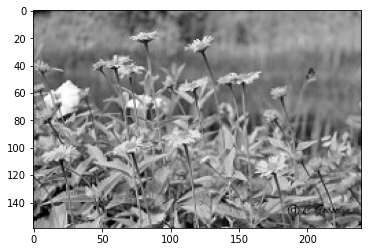

In [ ]:
# # TensorFlow and tf.keras
# import tensorflow as tf
# from tensorflow import keras

# # Helper libraries
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import cv2

# DATADIR = "/content/drive/MyDrive/Flowers_dataset/Input_dataset"
# CATEGORIES = ["daisy","rose","dandelion","sunflower","tulip"]

# for category in CATEGORIES:
#   path = os.path.join(DATADIR, category) # path to flowers
#   for img in os.listdir(path):
#     img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#     plt.imshow(img_array, cmap="gray")
#     plt.show()
#     break
#   break

In [ ]:
print(img_array.shape)

(159, 240)


In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = "/content/drive/MyDrive/Flowers_dataset/Input_dataset/processed_data/train"
test_data_dir = "/content/drive/MyDrive/Flowers_dataset/Input_dataset/processed_data/test"
valid_data_dir = "/content/drive/MyDrive/Flowers_dataset/Input_dataset/processed_data/val"

In [ ]:
train_datagen  = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip = True,
                                    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode = 'categorical',
    subset='training')  # set as training data

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') ##set as validation data


Found 1561 images belonging to 6 classes.
Found 343 images belonging to 6 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_height,img_width),
    batch_size=1,
    class_mode = 'categorical',
    subset = 'validation'
)  # set as validation data

Found 347 images belonging to 6 classes.


In [ ]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [ ]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam' , loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs = 10)

Epoch 1/10
49/49 [==============================] - 478s 9s/step - loss: 1.3071 - accuracy: 0.6634
Epoch 2/10
49/49 [==============================] - 20s 414ms/step - loss: 0.2261 - accuracy: 0.9207
Epoch 3/10
49/49 [==============================] - 21s 420ms/step - loss: 0.1433 - accuracy: 0.9481
Epoch 4/10
49/49 [==============================] - 20s 417ms/step - loss: 0.1251 - accuracy: 0.9583
Epoch 5/10
49/49 [==============================] - 20s 414ms/step - loss: 0.1198 - accuracy: 0.9562
Epoch 6/10
49/49 [==============================] - 20s 414ms/step - loss: 0.0701 - accuracy: 0.9803
Epoch 7/10
49/49 [==============================] - 20s 415ms/step - loss: 0.0720 - accuracy: 0.9773
Epoch 8/10
49/49 [==============================] - 20s 416ms/step - loss: 0.0528 - accuracy: 0.9795
Epoch 9/10
49/49 [==============================] - 20s 415ms/step - loss: 0.0468 - accuracy: 0.9803
Epoch 10/10
49/49 [==============================] - 20s 413ms/step - loss: 0.0347 - accuracy

In [ ]:
model.save('Flowers_dataset\Saved_Model\ResNet50_Flowers.h5')


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose = 2)
print('\n Test accuracy:',test_acc)

347/347 - 100s - loss: 0.4337 - accuracy: 0.8876

 Test accuracy: 0.8876080513000488
